# ML Workshop 

![](https://miro.medium.com/max/1000/1*qHbAsMNmdWQJkzm2SUA-8w.jpeg)

## Master Plan

### Class
1. Go over ML intuitions (yin-yang dataset)
2. Going mushy on mushrooms! 

### Team work
3. Titanic: Can you predict who survives? 



## 1. ML intuitions

![ml fields](https://wordstream-files-prod.s3.amazonaws.com/s3fs-public/styles/simple_image/public/images/machine-learning1.png?SnePeroHk5B9yZaLY7peFkULrfW8Gtaf&itok=yjEJbEKD)

For today we will focus on Surpervised Learning and we will be dealing with Classification problems. This is where we make predictions that label observations with a certain category based on examples. 

* It's called supervised because you have labeled data in the training dataset.

### Yin-Yang dataset

In [1]:
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from utils import plot_boundaries, get_ying_yang, scatterplot, plot_tree


simple = get_ying_yang() 

Here's our yin-yang dataset. Each row has the coordinates of a point and the label is the point is either white or black.

In [2]:
simple.head()

a         b  c
0  0.031595  0.986988  0
1  2.115098 -0.046244  1
2  0.882490 -0.075756  0
3 -0.055144 -0.037332  1
4  0.829545 -0.539321  1

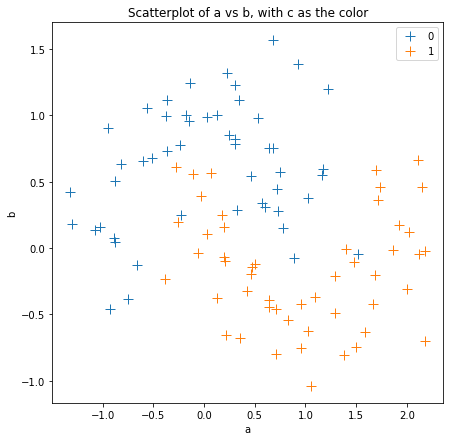

In [3]:
X_train = simple[['a', 'b']] 
y_train = simple['c']

scatterplot(simple, 'a', 'b', 'c', small=False)

### Why are we using this dataset? 

* Yin-yang is a great place to start understanding the decisions being made by different models.

In this case should be simple right? Our classifier just needs to understand that the area on the left is blue and the are on the right is orange...

There are many ways to do binary classification, but here we will focus on just 3 algorithms:
* Logistic Regression
* Decision Tree Classifier
* KNN Classifier ("K nearest neighbours")

To make predictions, we will be using the scikit-learn library. It is generally the standard for getting started with Machine Learning in Python, and a number of production systems use it for its simplicity and excellent community.

The API is extremely simple. When you have some features, and a target, you can fit a model by doing the following:

`model.fit(features, target)` 

* Remember the models you used on the workshop? They were following this API as well.

So what does it mean to fit (also known as training) a model?

Essentially, you are showing it some training data (some features, and a target), and allowing it to set its parameters (there are exceptions, but we'll cover this later) so that it can predict new observations.

Let's start with a classifier you already saw: [Logistic Regression](scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

Let's get it working on our yin-yang.

In [4]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression() # just instanciating! 

In [24]:
# our dataframe looks like this, remember
simple.head()

a         b  c
0  0.031595  0.986988  0
1  2.115098 -0.046244  1
2  0.882490 -0.075756  0
3 -0.055144 -0.037332  1
4  0.829545 -0.539321  1

We have just instantiated our model and it's now able to start learning. In this case, the examples (what we call the training dataset) are the features `a` and `b` and the target that it must learn is the `c`. 

We have already split the data before, so we will just use it.

In [5]:
log_model.fit(X=X_train, 
          y=y_train)

LogisticRegression()

The log_model is now fit, meaning that it has its parameters set, and is ready to make new predictions

**Making predictions**

We can now make predictions, using the `predict` method 

*Note: remember, we should never use the training set as a yardstick for the model quality, we're doing that here just to illustrate and show how the decision is being made*

In [6]:
predictions = log_model.predict(X_train) # dont predict on train!!!!
predictions

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In some models you can also predict probabilities! Very useful if you need to define the threshold. 

In [7]:
proba_predictions = log_model.predict_proba(X_train)
proba_predictions[0:10]

array([[0.91646485, 0.08353515],
       [0.06753893, 0.93246107],
       [0.22428487, 0.77571513],
       [0.49069444, 0.50930556],
       [0.08903094, 0.91096906],
       [0.2953638 , 0.7046362 ],
       [0.5378141 , 0.4621859 ],
       [0.04744784, 0.95255216],
       [0.73043241, 0.26956759],
       [0.24123415, 0.75876585]])

### Why would we want the probabilities? 🤔

* Not every problem needs a threshold on 0.5
* The threshold should be defined for every problem and different metrics should be used.

Let's assume you are using a ML model to analyse a mass that was found in someone's body. This ML model would output two probabilities: 
* Probability of being cancer (1)
* Probability of not being cancer (0)

In this case, the person in charge of building the model and how the model makes a decision has to be extremely careful on how the threshold is set. It's not ok to accept a 10% change of being cancer and sending the patient home...
* We want to make sure that we don't have False Negatives! 

![](https://www.researchgate.net/profile/Rune_Jacobsen2/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png)

Back to our probas...

In [8]:
proba_predictions = log_model.predict_proba(X_train)
proba_predictions[0:10]

array([[0.91646485, 0.08353515],
       [0.06753893, 0.93246107],
       [0.22428487, 0.77571513],
       [0.49069444, 0.50930556],
       [0.08903094, 0.91096906],
       [0.2953638 , 0.7046362 ],
       [0.5378141 , 0.4621859 ],
       [0.04744784, 0.95255216],
       [0.73043241, 0.26956759],
       [0.24123415, 0.75876585]])

If we just select the second column we have the probabilities of being one. This way we can set our own threshold

In [9]:
proba_1 = proba_predictions[:,1]


Remember the `log_model.predict()` we showed before? 

It's just - by default - setting the threshold to 0.5

In [10]:
print(list(map(lambda x: 1 if x > 0.5 else 0, proba_1))[0:10])
print(predictions[0:10])

[0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
[0 1 1 1 1 1 0 1 0 1]


**Observing predictions - How good the predicitons are?**

Let's use a quick utility function, `plot_boundaries` to get an idea. Naturally this will only work in 2 dimentions.

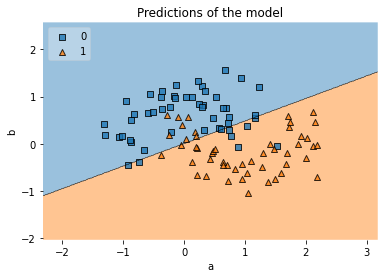

In [11]:
plot_boundaries(X_train, y_train, log_model)

Not particularly great. Too linear. 

#### Decision Tree Classifier 

Trees are slightly more powerful models than the logistic regressions, because they aren't forced to be linear. Let's see how a tree predicts our dataset: 



![](https://repository-images.githubusercontent.com/186166778/48227b00-8dbf-11e9-8d62-e0d54cae1431)

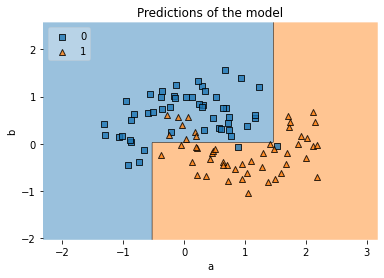

In [12]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
plot_boundaries(X_train, y_train, dt)

The hyper parameters of one model are one way to improve our models -> look for the best ones!

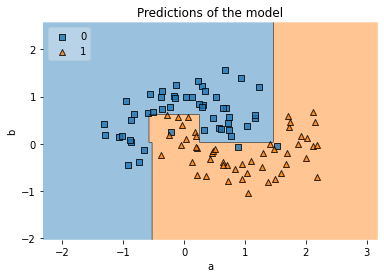

In [13]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_split=10)
dt.fit(X_train, y_train)
plot_boundaries(X_train, y_train, dt)

**KNN Classifier**

K-nearest-neighbours rely on the idea that an observation can be predicted by its `K` closest neighbours: 

![](https://dslytics.files.wordpress.com/2017/11/knn.png?w=800)

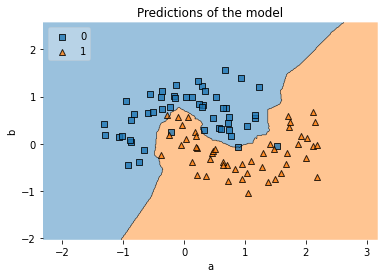

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
plot_boundaries(X_train, y_train, knn)

What if we make the `n_neighors` (number of neighbours) smaller?

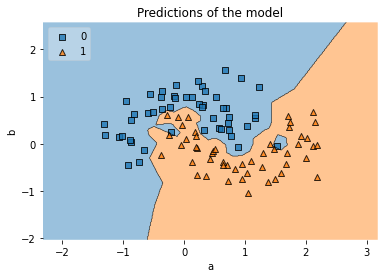

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
plot_boundaries(X_train, y_train, knn)

Here we observe something interesting. We got more of our training set right, but something is wrong. How can we avoid this?

### Overfitting and train test split

Alright, so up to now we've been predicting data the model has already seen, but what happens on data it doesn't know?
A quick reminder of how train and test sets work:

![](https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)

Now let's translate this in our dataframes. First, in a scheme

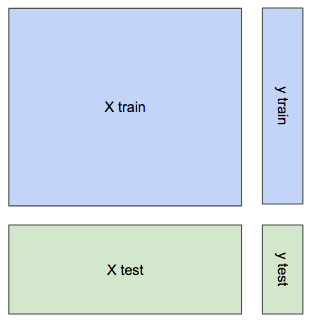

In [16]:
# Reminder:
# X_train: features to train on 
# y_train: targets (actual outcomes) to train on 
# X_test: features to test on 
# y_test: targets (actual outcomes) to test on 

X_train, X_test, y_train, y_test = train_test_split(simple[['a', 'b']], 
                                                    simple['c'], 
                                                    test_size=0.33, 
                                                    random_state=42)

Let's go back to our KNN, and train on part of the dataset, and observe how it predicts the other part:

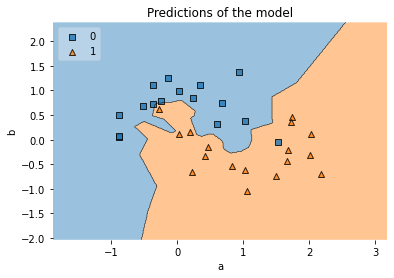

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
plot_boundaries(X_test, y_test, knn)

Now we start to notice that there is some overfit (notice theblue "entrance").


Let's increase the n_neigbors again:

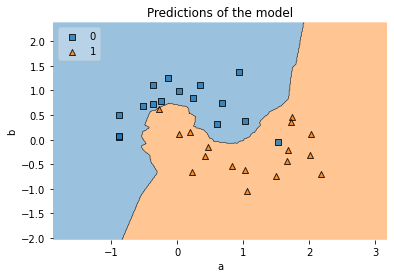

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
plot_boundaries(X_test, y_test, knn)

Much better! We can fight overfitting with sensible setting of hyper parameters.

### Evaluating our results

Hopefully you now have an intuition as to why it is important to always train on your traninig set, and test on your test set.

One trivial (but often too basic) way to evaluate your model is using accuracy (literally percentage of times you get the answer right):

In [19]:
# toy example 
predicted = [1, 0, 1]
true = [1, 0, 0]
print(accuracy_score(y_true=true, y_pred=predicted))

0.6666666666666666


Let's evaluate how well each of our classifiers does on unseen data:

In [20]:
def get_accuracy(model, xtrain, ytrain, xtest, ytest):
    model = model()
    model.fit(xtrain, ytrain)
    predictions = model.predict(xtest)
    accuracy = accuracy_score(y_true=ytest, y_pred=predictions)
    print('Accuracy for %s was %0.2f' % ('Logistic Regression', accuracy))

`get_accuracy()` is just a function that is:
* Instantiating the model
* Fit the model
* Making predictions
* Calculating the accuracy of that model

In [21]:
get_accuracy(LogisticRegression, X_train, y_train, X_test, y_test)

Accuracy for Logistic Regression was 0.85


In [22]:
get_accuracy(DecisionTreeClassifier, X_train, y_train, X_test, y_test)

Accuracy for Logistic Regression was 0.94


In [23]:
get_accuracy(KNeighborsClassifier, X_train, y_train, X_test, y_test)

Accuracy for Logistic Regression was 0.97
